## Simulation

In [19]:
%load_ext autoreload
%autoreload 2

from entities.simulation import Simulation

"""
The car spawn policy determines the directions in which cars 
will spawn and the duration for which they will spawn in that direction.
"""
car_spwan_policy = [
     ('all_directions', 5),    # 5 minutes    
     ('no_cars', 1),           # 1 minute  
     ('up_down', 2),           # 2 minutes
     ('left_right', 2),        # 2 minutes
     ('all_directions', 5)     # 5 minutes 
]

simulation = Simulation(
     name="Ambient Test",
     car_spawn_frequency=1.5,  # Car every 1.5 seconds
     simulation_duration=900,  # 15 minutes
     car_spwan_policy=car_spwan_policy,
)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
simulation.run('ft')

In [21]:
simulation.run('mdp')

## Load data

In [23]:
import pandas as pd

# Load the cumulative waiting times from the csv files
cumulative_waiting_times_mdp = pd.read_csv('data/cumulative_waitingtimes_mdp.csv', index_col=0, names=['cumulative_waiting_time'])
cumulative_waiting_times_ft = pd.read_csv('data/cumulative_waitingtimes_ft.csv', index_col=0, names=['cumulative_waiting_time'])

# Load the number of stopped cars
n_stopped_cars_mdp = pd.read_csv('data/stopped_cars_mdp.csv', index_col=0, names=['stopped_cars'])
n_stopped_cars_ft = pd.read_csv('data/stopped_cars_ft.csv', index_col=0, names=['stopped_cars'])

## Plot results

In [28]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.style.use('fivethirtyeight')

C:\Users\david\AppData\Local\Temp\ipykernel_24292\2581080902.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{int(x)//60}' for x in ax.get_xticks()], fontsize=12)


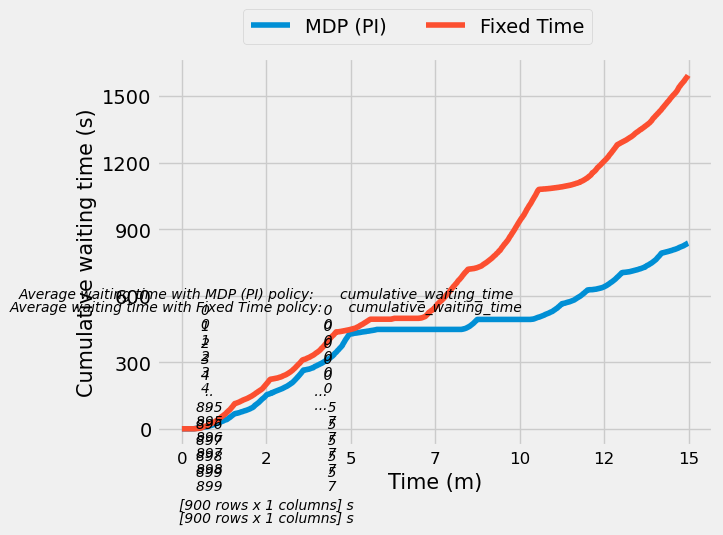

In [43]:
## The Fixed Time agent makes people arrive late!

plt.plot(range(len(cumulative_waiting_times_mdp)), cumulative_waiting_times_mdp, label='MDP (PI)')
plt.plot(range(len(cumulative_waiting_times_ft)), cumulative_waiting_times_ft, label='Fixed Time')

plt.xlabel('Time (m)', fontsize=15)
plt.ylabel('Cumulative waiting time (s)', fontsize=15)

ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(nbins=6))
ax.xaxis.set_major_locator(MaxNLocator(nbins=7))

ax.set_xticklabels([f'{int(x)//60}' for x in ax.get_xticks()], fontsize=12)

plt.text(150,
         -0.6*ax.get_yticks()[3],
         f"Average waiting time with MDP (PI) policy: {cumulative_waiting_times_mdp['cumulative_waiting_time']//n_stopped_cars_mdp['stopped_cars'][0]} s",
         horizontalalignment='center',
         fontsize = 10,
         fontstyle = 'italic')
plt.text(150,
         -(0.6*ax.get_yticks()[3] + 0.2*ax.get_yticks()[2]),
         f"Average waiting time with Fixed Time policy: {cumulative_waiting_times_ft['cumulative_waiting_time']//n_stopped_cars_ft['stopped_cars'][0]} s",
         horizontalalignment='center',
         fontsize = 10,
         fontstyle = 'italic')

plt.legend(prop={'size': 14}, bbox_to_anchor=(0.8, 1.15), ncol=2)

plt.show()

## TODO - Queue lengths plots

In [ ]:
## Queues might become annoying with a Fixed Time policy!

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

axs[0].plot(range(len(queue_lengths['mdp'])), queue_lengths['mdp'], label='MDP (PI)')
axs[0].plot(range(len(queue_lengths['ft'])), queue_lengths['ft'], label='Fixed Time')

axs[0].set_xlabel('Number of queues (sorted by time)', fontsize=15)
axs[0].set_ylabel('Queue length', fontsize=15)

axs[0].yaxis.set_major_locator(MaxNLocator(nbins=6))
axs[0].xaxis.set_major_locator(MaxNLocator(nbins=6))

axs[0].text(0.5*max(axs[0].get_xticks()), -0.3*axs[0].get_yticks()[3], f'Number of cars that stopped with MDP (PI) policy: {n_stopped_cars["mdp"]}', horizontalalignment='center', fontsize = 10, fontstyle = 'italic')

axs[0].vlines(len(queue_lengths['mdp'])-1, 0, queue_lengths['mdp'][-1], color='#008FD5', linestyle='--', linewidth=2)
axs[0].text(len(queue_lengths['mdp'])-1, -0.5, len(queue_lengths['mdp'])-1, color='#008FD5', fontsize=12, fontstyle='italic')

axs[0].vlines(len(queue_lengths['ft'])-1, 0, queue_lengths['ft'][-1], color='#FF2700', linestyle='--', linewidth=2)
axs[0].text(len(queue_lengths['ft'])-1, -0.5, len(queue_lengths['ft'])-1, color='#FF2700', fontsize=12, fontstyle='italic')

axs[1].plot(range(len(queue_lengths['mdp'])), sorted(queue_lengths['mdp']), label='MDP (PI)')
axs[1].plot(range(len(queue_lengths['ft'])), sorted(queue_lengths['ft']), label='Fixed Time')

axs[1].set_xlabel('Number of queues (sorted by length)', fontsize=15)

axs[1].yaxis.set_major_locator(MaxNLocator(nbins=6))
axs[1].yaxis.tick_right()
axs[1].xaxis.set_major_locator(MaxNLocator(nbins=6))

axs[1].legend(prop={'size': 14}, bbox_to_anchor=(1.4, 0.5))

axs[1].text(0.5*max(axs[1].get_xticks()), -0.3*axs[1].get_yticks()[3], f'Number of cars that stopped with Fixed Time policy: {n_stopped_cars["ft"]}', horizontalalignment='center', fontsize = 10, fontstyle = 'italic')

axs[1].vlines(len(queue_lengths['mdp'])-1, 0, sorted(queue_lengths['mdp'])[-1], color='#008FD5', linestyle='--', linewidth=2)
axs[1].text(len(queue_lengths['mdp'])-1, -0.5, len(queue_lengths['mdp'])-1, color='#008FD5', fontsize=12, fontstyle='italic')

axs[1].vlines(len(queue_lengths['ft'])-1, 0, sorted(queue_lengths['ft'])[-1], color='#FF2700', linestyle='--', linewidth=2)
axs[1].text(len(queue_lengths['ft'])-1, -0.5, len(queue_lengths['ft'])-1, color='#FF2700', fontsize=12, fontstyle='italic')

plt.tight_layout()

plt.show()